In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import PIL
import tensorflow as tf

In [2]:
valpath='/kaggle/input/chest-xray-pneumonia/chest_xray/val/'
trainpath='/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
testpath='/kaggle/input/chest-xray-pneumonia/chest_xray/test/'

In [3]:
os.listdir(trainpath)

['PNEUMONIA', 'NORMAL']

In [4]:
os.listdir(testpath)

['PNEUMONIA', 'NORMAL']

In [5]:
os.listdir(valpath)

['PNEUMONIA', 'NORMAL']

In [6]:
batch_size = 64
img_h = 224
img_w = 224

In [7]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpeg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0   PNEUMONIA                   3875
1      NORMAL                   1341


In [8]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpeg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0   PNEUMONIA                    390
1      NORMAL                    234


In [9]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(valpath ) : 
    files = gb.glob(pathname= str( valpath  + folder + '/*.jpeg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0   PNEUMONIA                      8
1      NORMAL                      8


In [10]:
for img in files[:5]:
    print(img)

/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg


PNEUMONIA


<function matplotlib.pyplot.show(close=None, block=None)>

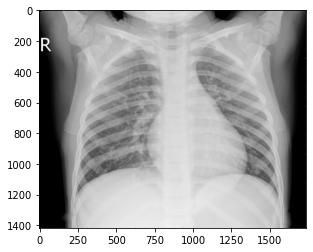

In [11]:
print(Folder_name[0])
imge=cv2.imread(files[0])
plt.imshow(imge)
plt.show

In [12]:

#loading data and resize it and collect it in one folder
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpeg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'NORMAL':0 , 'PNEUMONIA':1}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  PNEUMONIA
numbers of images in folder are :  3875
 start reading images
image reading ...finished
folder name is :  NORMAL
numbers of images in folder are :  1341
 start reading images
image reading ...finished
--------------------------------------------------
items in X_train is:        5216  items
items in y_train is:        5216  items


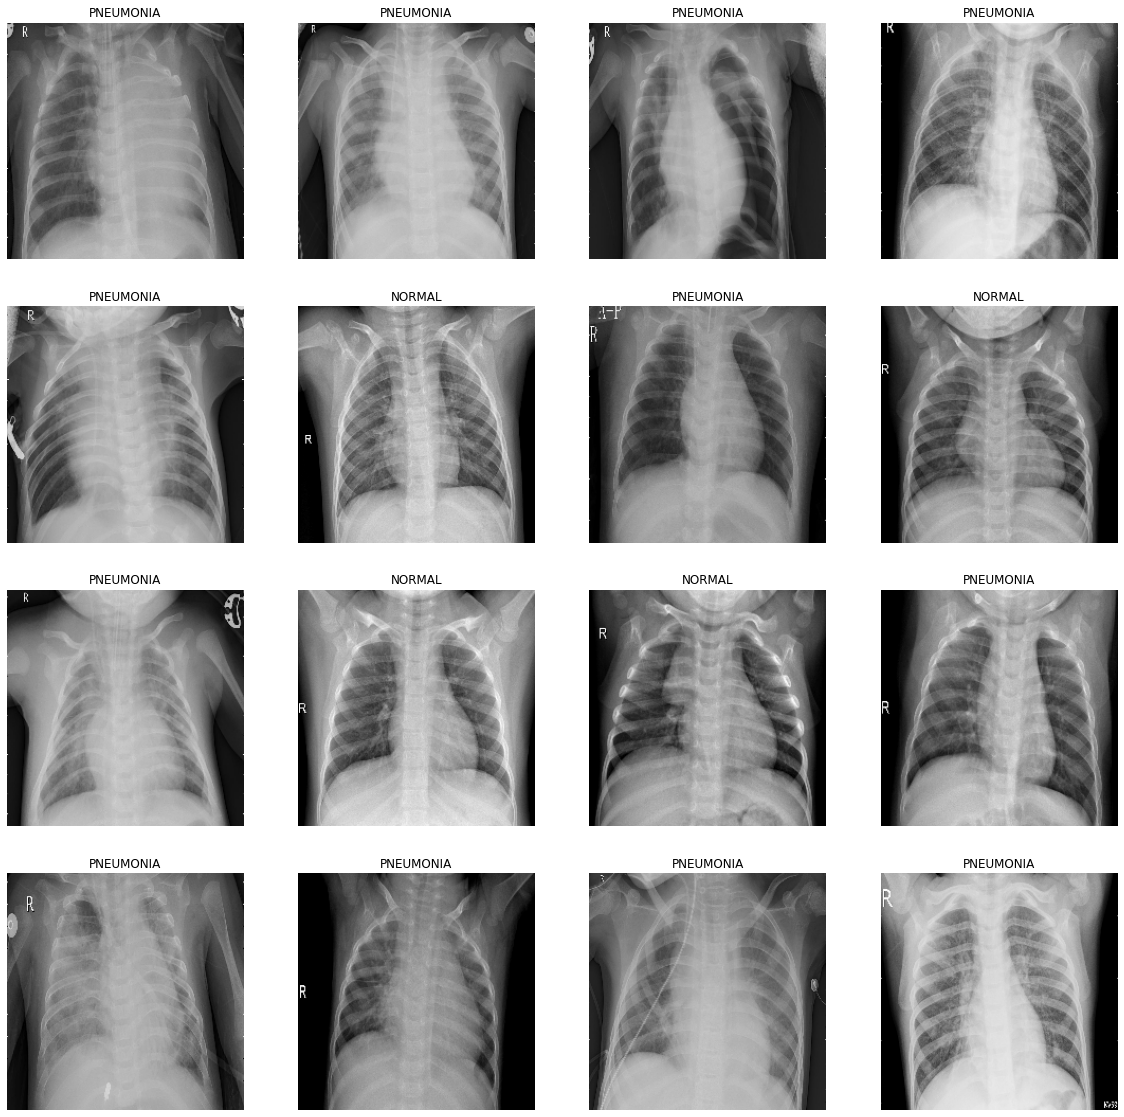

In [13]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])   
    plt.axis('off')
    classes  = {'NORMAL':0 , 'PNEUMONIA':1}

    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [14]:
#loading data and resize it and collect it in one folder
new_size=224    
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpeg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'NORMAL':0 , 'PNEUMONIA':1}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_test.append(resized_image)
        y_test.append(image_class[folder])
#check items in X_test
print("items in X_test is:       ",len(X_test) , " items") 
print("items in y_test is:       ",len(y_test) , " items") 

folder name is :  PNEUMONIA
numbers of images in folder are :  390
 start reading images
folder name is :  NORMAL
numbers of images in folder are :  234
 start reading images
items in X_test is:        624  items
items in y_test is:        624  items


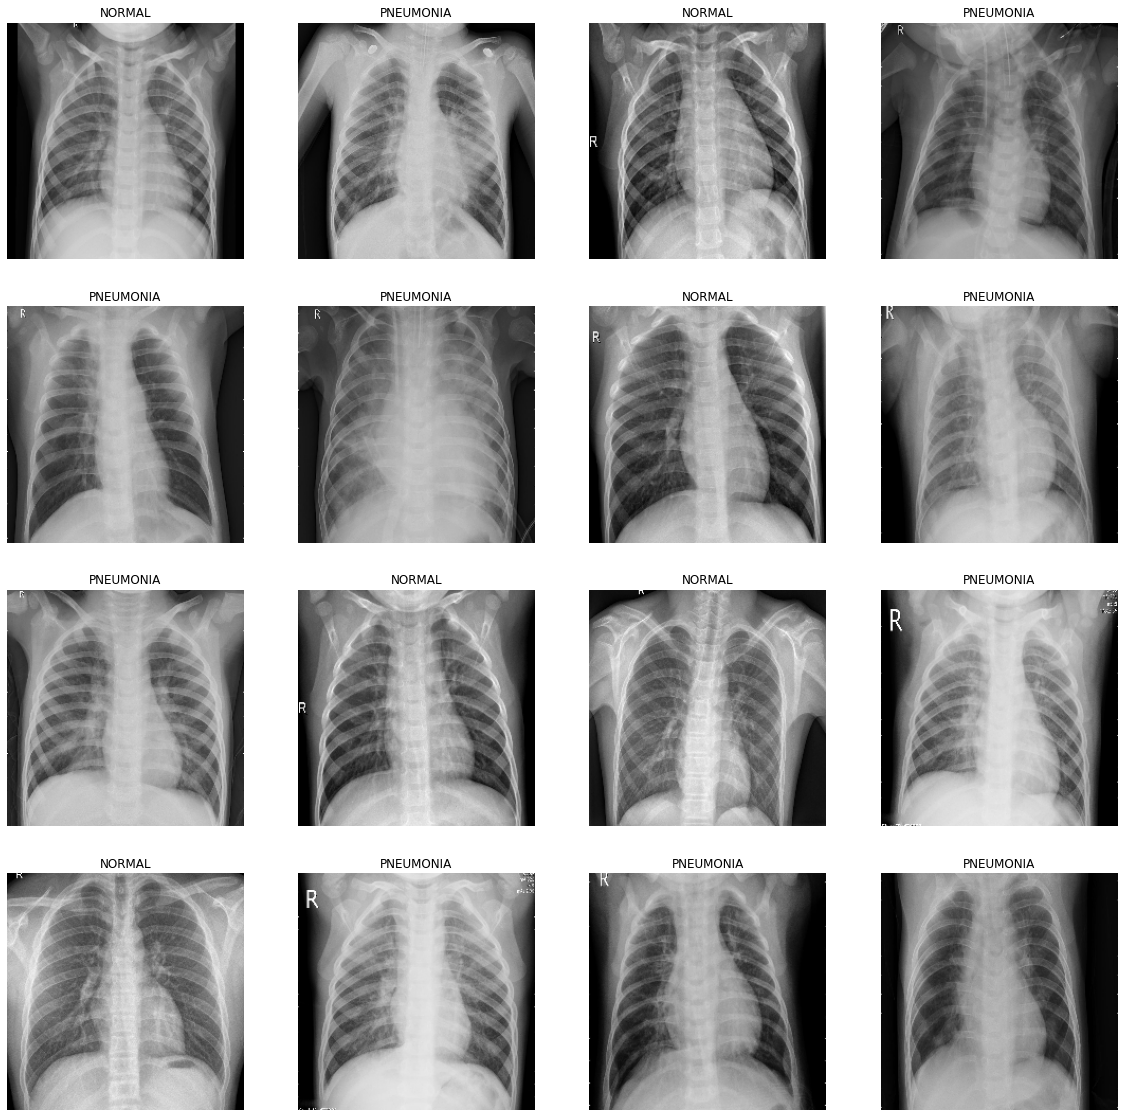

In [15]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    classes ={'NORMAL':0 , 'PNEUMONIA':1}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_test[i]))

In [16]:
predpath='/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/'

x_pred=[]
files=gb.glob(pathname= str( predpath + '/*.jpeg'))

for file in files:
    imag=cv2.imread(file)
   
    image = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

    imagee= cv2.resize(image , (new_size,new_size))

    x_pred.append(list(imagee))
len(x_pred)

8

In [17]:
prdpath='/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/'


files=gb.glob(pathname= str( prdpath + '/*.jpeg'))

for file in files:
    imag=cv2.imread(file)
   
    image = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

    imagee= cv2.resize(image , (new_size,new_size))

    x_pred.append(list(imagee))
len(x_pred)

16

In [18]:
from sklearn.utils import shuffle
x_pred = shuffle(x_pred)


In [19]:
#converting all TRAIN data to array
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (5216, 224, 224, 3)
y_train shape : (5216,)


In [20]:
#converting all TEST data to array
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_test shape  : (624, 224, 224, 3)
y_test shape : (624,)


In [21]:
x_pred = np.array(x_pred)
print("x_pred shape  :" ,x_pred.shape)

x_pred shape  : (16, 224, 224, 3)


x_pred_pne = np.array(x_pred_pne)
print("x_pred shape  :" ,x_pred_pne.shape)

In [22]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,SeparableConv2D

In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50
#base_model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights = 'imagenet')
#for layer in base_model.layers:
 #   layer.trainable = False
model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights = 'imagenet')
# mark loaded layers as not trainable
for layer in model.layers[:70]:
    layer.trainable = False

for layer in model.layers[70:]:
    layer.trainable = True

2022-03-23 01:12:02.577859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 01:12:02.675424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 01:12:02.676144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 01:12:02.677256: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 1s 0us/step


In [24]:
len(model.layers)

175

In [25]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [26]:
x=Flatten()(model.output)

x=Dropout(rate=0.5)(x)

x=Dense(512,activation = "relu")(x)
x=Dropout(rate=0.3)(x)
x=Dropout(rate=0.3)(x)

x=Dense(1, activation ='sigmoid')(x)

model = Model(model.input, x)


model = Sequential([
    Conv2D(32,3, padding = "same", activation = "relu" ,input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64,3, padding = "same",activation = "relu"),
    MaxPooling2D(2,2),
    
    Conv2D(128,3, padding = "same",activation = "relu"),
    MaxPooling2D(2,2),
 
    Conv2D(128,3, padding = "same",activation = "relu"),
    MaxPooling2D(2,2),
    Dropout(rate=0.2),
    
    Conv2D(128,3, padding = "same",activation = "relu"),
    MaxPooling2D(2,2),
    
    
    Conv2D(128,3, padding = "same",activation = "relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dropout(rate=0.5),
    
    Dense(512,activation = "relu"),
    
    Dense(1, activation ='sigmoid')
])

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [28]:
opt=tf.keras.optimizers.Adam(0.0001)

model.compile(optimizer=opt,loss='binary_crossentropy' , metrics='accuracy')
#model.compile(optimizer='adam',
#loss='sparse_categorical_crossentropybinary_crossentropy',metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger, LearningRateScheduler,TensorBoard

In [30]:
earlystop=EarlyStopping(patience=15)
filepath = "pneum_or_not.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
log_fname = 'model_pneum_or_not.csv'
csv_logger = CSVLogger(filename=log_fname,separator=',',append=False)
callbacks_list = [checkpoint, csv_logger,earlystop] 
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
X_train.shape,y_train.shape

((5216, 224, 224, 3), (5216,))

In [31]:
X_train.shape,y_train.shape

((5216, 224, 224, 3), (5216,))

In [32]:
len(X_train)

5216

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 16
#create image generator for images 
train_data_gen = ImageDataGenerator(
                                 # rescale = 1./255,
                                #shear_range = 0.2,
                                fill_mode='nearest',
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                horizontal_flip=True, 
                                rotation_range = 20,   

                               )

test_data_gen  = ImageDataGenerator()

test = test_data_gen.flow(
      X_test,
      y_test,
      shuffle=True, 
      batch_size=batch_size
      )
train = train_data_gen.flow(
      X_train,
      y_train,
      shuffle=True, 
      batch_size=batch_size
      )

In [34]:
history= model.fit(train,validation_data=test,epochs=15,verbose=1,batch_size=32,callbacks=[callbacks_list,lr_reduce])

2022-03-23 01:12:08.049141: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-03-23 01:12:13.531857: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


326/326 [==============================] - 74s 194ms/step - loss: 0.4040 - accuracy: 0.9206 - val_loss: 0.3584 - val_accuracy: 0.9087

Epoch 00001: val_accuracy improved from -inf to 0.90865, saving model to pneum_or_not.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
326/326 [==============================] - 63s 192ms/step - loss: 0.1500 - accuracy: 0.9532 - val_loss: 0.6040 - val_accuracy: 0.9071

Epoch 00002: val_accuracy did not improve from 0.90865
Epoch 3/15
326/326 [==============================] - 62s 190ms/step - loss: 0.0841 - accuracy: 0.9682 - val_loss: 0.6550 - val_accuracy: 0.9215

Epoch 00003: val_accuracy improved from 0.90865 to 0.92147, saving model to pneum_or_not.h5
Epoch 4/15
326/326 [==============================] - 62s 191ms/step - loss: 0.0885 - accuracy: 0.9668 - val_loss: 0.3109 - val_accuracy: 0.9231

Epoch 00004: val_accuracy improved from 0.92147 to 0.92308, saving model to pneum_or_not.h5
Epoch 5/15
326/326 [==============================] - 62s 189ms/step - loss: 0.0701 - accuracy: 0.9734 - val_loss: 0.3243 - val_accuracy: 0.9407

Epoch 00005: val_accuracy improved from 0.92308 to 0.94071, saving model to pneum_or_not.h5

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epo

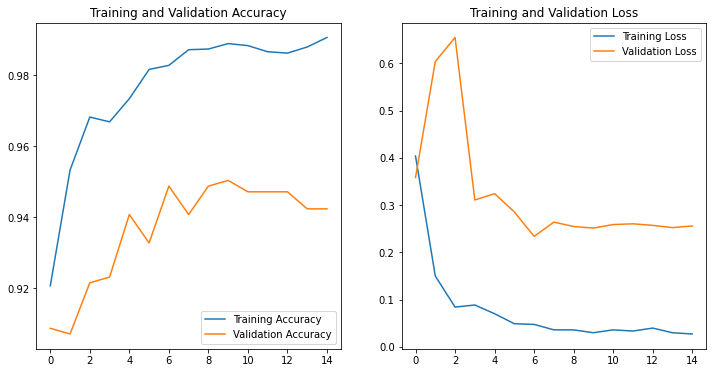

In [35]:
#showing results and model accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs=30
epochs_range = range(15)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [36]:
prdiction = model.predict(X_test)
prdiction.shape

(624, 1)

In [37]:
prdiction = np.where(prdiction>0.5, 1, 0)


In [38]:
metrics = model.evaluate(X_test, y_test)

20/20 [==============================] - 2s 53ms/step - loss: 0.2559 - accuracy: 0.9423


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prdiction))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       234
           1       0.94      0.97      0.95       390

    accuracy                           0.94       624
   macro avg       0.94      0.93      0.94       624
weighted avg       0.94      0.94      0.94       624



In [40]:
prediction = model.predict(x_pred)

In [41]:
prediction = np.where(prediction>0.5, 1, 0)

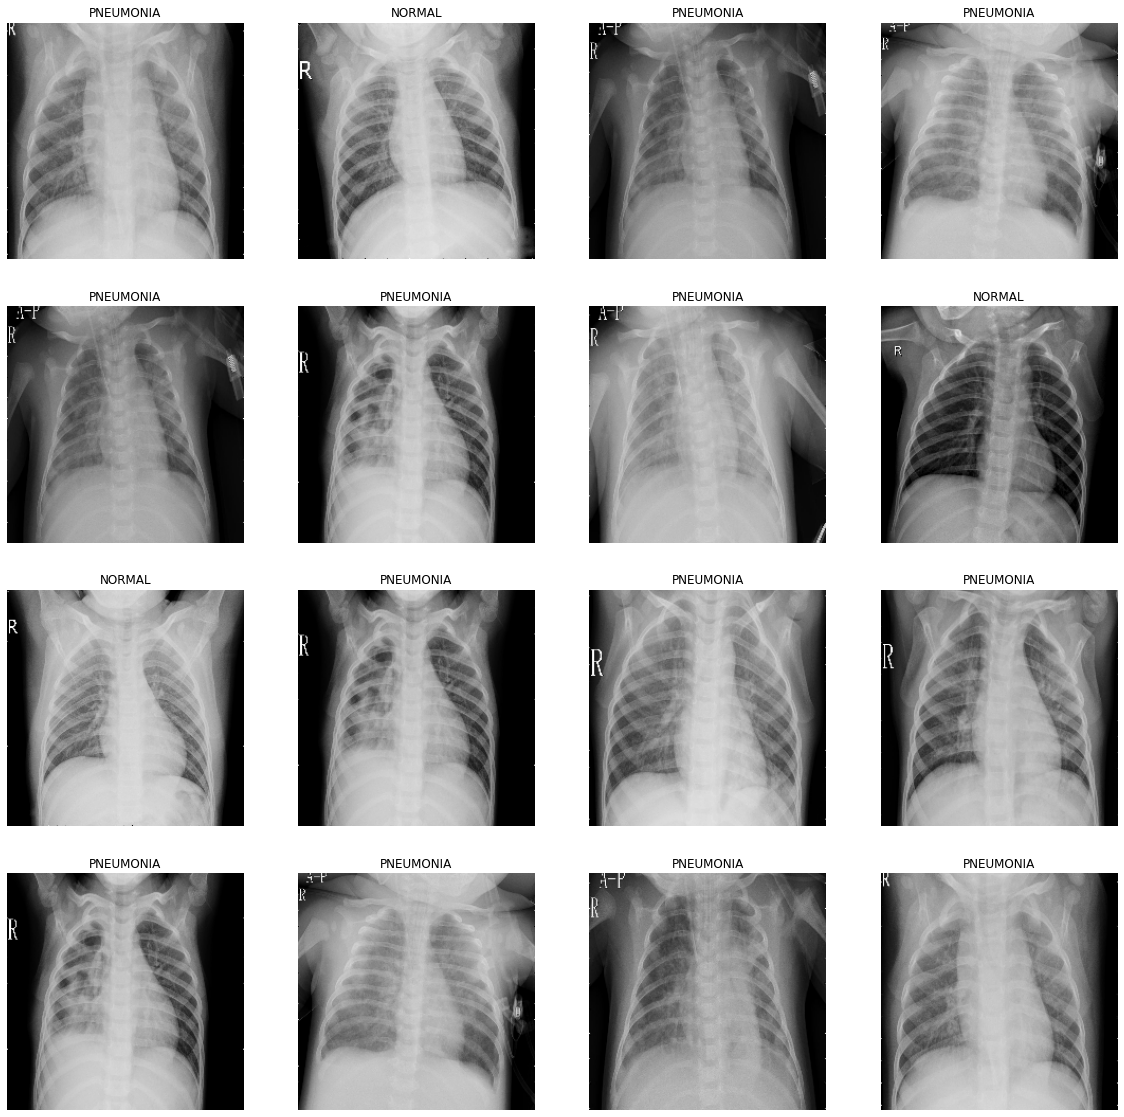

In [44]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    
    classes ={'NORMAL':0 , 'PNEUMONIA':1}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(prediction[i]))
    